<a href="https://colab.research.google.com/github/hyeeeeeon/Challenge_DongA/blob/main/Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 캐글에서 데이터 셋 다운로드

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("safrin03/predictive-analytics-for-customer-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.0M/24.0M [00:00<00:00, 55.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/safrin03/predictive-analytics-for-customer-churn-dataset/versions/1


## 다운로드 된 데이터 셋 확인

In [2]:
import os

# 다운로드된 데이터셋 경로
path = kagglehub.dataset_download("safrin03/predictive-analytics-for-customer-churn-dataset")

# 파일 목록 출력
print("Downloaded files:", os.listdir(path))


Downloaded files: ['data_descriptions.csv', 'train.csv', 'test.csv', '.nfs00000000124e264200000087']


# 1. 데이터셋 불러오고 확인하기

In [3]:
import pandas as pd

csv = pd.read_csv(os.path.join(path, "train.csv"))

df = pd.DataFrame(csv)

df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,63SJ44RT4A,0


In [4]:
# 데이터의 크기 확인
print('-------------------------행, 열----------------------')
print(df.shape)  # (행, 열)
print('---------------------컬럼 정보------------------------')
# 컬럼 정보 확인
print(df.info())
print('-------------------------결측치-----------------------')
# 결측치 확인
print(df.isnull().sum())
print('----------------------기본 통계-----------------------')
# 기본 통계 정보 확인
print(df.describe())

-------------------------행, 열----------------------
(243787, 21)
---------------------컬럼 정보------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-nul

## 결측치 확인
pandas의 isna() 이용

=> 데이터가 있으면 False, 없으면 True로 표시

In [5]:
pd.isna(df)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243783,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243784,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243785,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 열별 결측치 개수 확인
sum() 이용하여 확인

In [6]:
pd.isna(df).sum()

,0
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


### 예측값이 0만 나와서 확인중
* Churn 항목 편향 확인

  value_counts() 이용



In [14]:
df['Churn'].value_counts()

,count
Churn,
0,199605
1,44182


# 데이터 전처리

## 필요 라이브러리 import

> * pandas, numpy : 데이터 핸들링
> * scikit - learn, xgboost : 모델링
> * joblib : 모델 저장
> * warning : 경고 무시용


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib
import warnings

warnings.filterwarnings('ignore')

## 전처리용 함수
1. 원본 복사 및 'CustomerID' 컬럼 삭제
    
    => 개인 아이디는 이탈 예측에 별 다른 영향을 미치지 않는다고 판단, 불필요한 컬럼이 학습에 포함되면 모델이 과적합 될 수 있으므로 제거

2. Yes or No 값을 가지는 컬럼 숫자로 처리
    
    => 머신러닝은 string 처리 못함. 정수로 변환
     (Yes = 0, No = 1)

3. 범주형 컬럼은 One - Hot Encoding

    => 이것도 string 타입이라 2차원 배열로 0과 1의 값을 넣어 변형

4. 표준화

    => 서로 다른 범위를 같은 스케일로 맞춰서 모델 학습 속도와 정확성 향상

    * avg = 0, std = 1








### Q. 다중공선성(Multicollinearity)
      
      * 여러 변수들이 서로 강한 상관관계를 가지는 것
      * 특정 변수가 다른 변수들의 선형 결합으로 정확히 예측 가능할 때 발생
      
      => 회귀 계수가 불안정해지고, 모델 해석이나 일반화가 어려움

      e.g.) SubscriptionType Colunm

          => Basic, Standard, Premiun
          
          이 경우 Basic에 해당되면 Basic만 1을 가지고, 나머지 두 값은 0을 가짐

          이걸 보면 세 칼럼 값을 다 합치면 항상 1이 나옴

          머신러닝 모델이 세 칼럼을 다 보면 값을 자동 계산이 가능해짐

          => 다른 두 개로 하나의 값 예측 가능(선형 종속)

          => 정확한 회귀 계수 추정 불가능

          => Variance Inflation Factor 증가 = 모델 불안정 (다중공정성 측정 지표)

      * 해결하기 위해서 drop_first = True 설정

        e.g.) Basic 칼럼 삭제, Standard, Premium은 유지

        => Standard도 Premium도 0이면 Basic임을 앎

        * 정보 손실 없이 다중공선성 제거

    Q. 어느 모델에서 좋음?
    A. Logisitc Regression 선형모델에서 좋음
    RandomForest나 XGBoost와 같은 트리 기반 모델에서는 Logistic Regression 보다 낫지만 깔끔한 전처리를 위해서 해주는 게 좋음

    Q. One-Hot Encoding을 선택한 이유
    A. 컬럼 값에 숫자적/논리적 순서가 없음
        => 0과 1로 표현이 가능함.

    +) Ordinal Enocoding : 값 사이에 순서가 있을 때
        e.g.) small, medium, large

    +) Target Encoding : 각 항목마다 타깃이 되는 값(여기서는 Churn)의 평균을 계산하여 같은 항목은 전부 평균값으로 처리


In [11]:
def preprocess_data(df: pd.DataFrame) -> tuple:
    df = df.copy()

    # CustomerID 컬럼 제거
    df.drop('CustomerID', axis=1, inplace=True)

    # Yes/No로 표현되는 항목 1/0으로 변경
    binary_cols = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']
    for col in binary_cols:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

    # One-hot encoding (다중공선성 제거를 위한 drop_first = True 설정)
    multi_class_cols = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference', 'Gender']
    df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

    # 표준화
    num_cols = [
        'AccountAge', 'MonthlyCharges', 'TotalCharges',
        'ViewingHoursPerWeek', 'AverageViewingDuration',
        'ContentDownloadsPerMonth', 'UserRating',
        'SupportTicketsPerMonth', 'WatchlistSize'
    ]
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df

In [15]:
train_df = pd.read_csv(os.path.join(path, "train.csv"))
test_df = pd.read_csv(os.path.join(path, "test.csv"))

# 데이터 전처리
train_df = preprocess_data(train_df)

# 학습을 위해서 정답값 분리
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

test_df = preprocess_data(test_df)

# 예측용 분기 처리
if 'Churn' in test_df.columns:
    # 평가용
    X_test = test_df.drop('Churn', axis=1)
    y_test = test_df['Churn']
else:
    # 예측용
    X_test = test_df
    y_test = None  # 평가하지 않음

# 4. Model training
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"--- {name} ---")
    if y_test is not None:
        print(classification_report(y_test, preds))
        print(f"ROC-AUC: {roc_auc_score(y_test, preds):.4f}\\n")
    else:
        print(f"예측 결과 샘플: {preds[:5]}")
        print(f"총 예측 수: {len(preds)}\\n")

# 5. Best Model Save (example with Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'churn_model.pkl')

print("\nModel saved as churn_model.pkl")


--- Logistic Regression ---
예측 결과 샘플: [0 0 0 0 0]
총 예측 수: 104480\n
--- Random Forest ---
예측 결과 샘플: [0 0 0 0 0]
총 예측 수: 104480\n
--- XGBoost ---
예측 결과 샘플: [0 0 1 0 0]
총 예측 수: 104480\n

Model saved as churn_model.pkl


결과값이 이상해서 확인용
* 전처리 후 NaN 값 있는지 확인
  isnull().sum().sum() 이용

  → 0 아니면 문제

* X 데이터들 describe() 값 점검

  → 모든 피처가 0에 가까운 값으로 수렴하는지

In [16]:
print(X_train.isnull().sum().sum())

0


In [17]:
print(X_test.isnull().sum().sum())

0


In [18]:
print(X_train.describe().T[['mean', 'std', 'min', 'max']])

                                  mean       std       min       max
AccountAge                9.501611e-17  1.000002 -1.723308  1.718423
MonthlyCharges           -4.438360e-16  1.000002 -1.733206  1.732889
TotalCharges              1.498107e-17  1.000002 -1.425711  3.112348
PaperlessBilling          4.996452e-01  0.500001  0.000000  1.000000
MultiDeviceAccess         4.994196e-01  0.500001  0.000000  1.000000
ViewingHoursPerWeek      -5.562815e-16  1.000002 -1.734488  1.734081
AverageViewingDuration   -6.482081e-17  1.000002 -1.727815  1.737154
ContentDownloadsPerMonth -7.099977e-17  1.000002 -1.699138  1.698651
UserRating               -7.228220e-18  1.000002 -1.733559  1.728860
SupportTicketsPerMonth   -4.927139e-17  1.000002 -1.568014  1.565099
WatchlistSize             1.171671e-16  1.000002 -1.670857  1.665711
ParentalControl           5.007855e-01  0.500000  0.000000  1.000000
SubtitlesEnabled          5.011752e-01  0.500000  0.000000  1.000000


In [19]:
print(X_test.describe().T[['mean', 'std', 'min', 'max']])

                                  mean       std       min       max
AccountAge               -3.577196e-17  1.000005 -1.722763  1.718989
MonthlyCharges           -5.285036e-16  1.000005 -1.727791  1.734983
TotalCharges             -1.661084e-16  1.000005 -1.426990  3.126208
PaperlessBilling          4.968989e-01  0.499993  0.000000  1.000000
MultiDeviceAccess         5.014070e-01  0.500000  0.000000  1.000000
ViewingHoursPerWeek      -2.871958e-16  1.000005 -1.733450  1.735229
AverageViewingDuration    5.046499e-16  1.000005 -1.731051  1.725294
ContentDownloadsPerMonth -8.160904e-18  1.000005 -1.691959  1.698754
UserRating               -3.305166e-16  1.000005 -1.732893  1.731186
SupportTicketsPerMonth   -1.018753e-16  1.000005 -1.566978  1.561622
WatchlistSize            -1.883809e-17  1.000005 -1.671331  1.660115
ParentalControl           4.973201e-01  0.499995  0.000000  1.000000
SubtitlesEnabled          5.001819e-01  0.500002  0.000000  1.000000


In [20]:
# 이진 피처의 실제 분포 확인
print(X_train['PaperlessBilling'].value_counts(normalize=True))
print(X_train['ParentalControl'].value_counts(normalize=True))

PaperlessBilling
0    0.500355
1    0.499645
Name: proportion, dtype: float64
ParentalControl
1    0.500786
0    0.499214
Name: proportion, dtype: float64


In [21]:
# Churn별 평균값 비교 (피처별로)
print(train_df.groupby('Churn').mean().T)

Churn                                  0         1
AccountAge                      0.093030 -0.420289
MonthlyCharges                 -0.047270  0.213556
TotalCharges                    0.056706 -0.256185
PaperlessBilling                0.499862  0.498665
MultiDeviceAccess               0.499722  0.498054
ViewingHoursPerWeek             0.060524 -0.273436
AverageViewingDuration          0.069111 -0.312230
ContentDownloadsPerMonth        0.061045 -0.275789
UserRating                     -0.010409  0.047024
SupportTicketsPerMonth         -0.039550  0.178680
WatchlistSize                  -0.010228  0.046206
ParentalControl                 0.502087  0.494907
SubtitlesEnabled                0.504086  0.488027
SubscriptionType_Premium        0.338979  0.297746
SubscriptionType_Standard       0.334766  0.341746
PaymentMethod_Credit card       0.255700  0.223734
PaymentMethod_Electronic check  0.248050  0.267100
PaymentMethod_Mailed check      0.246266  0.262482
ContentType_Movies             

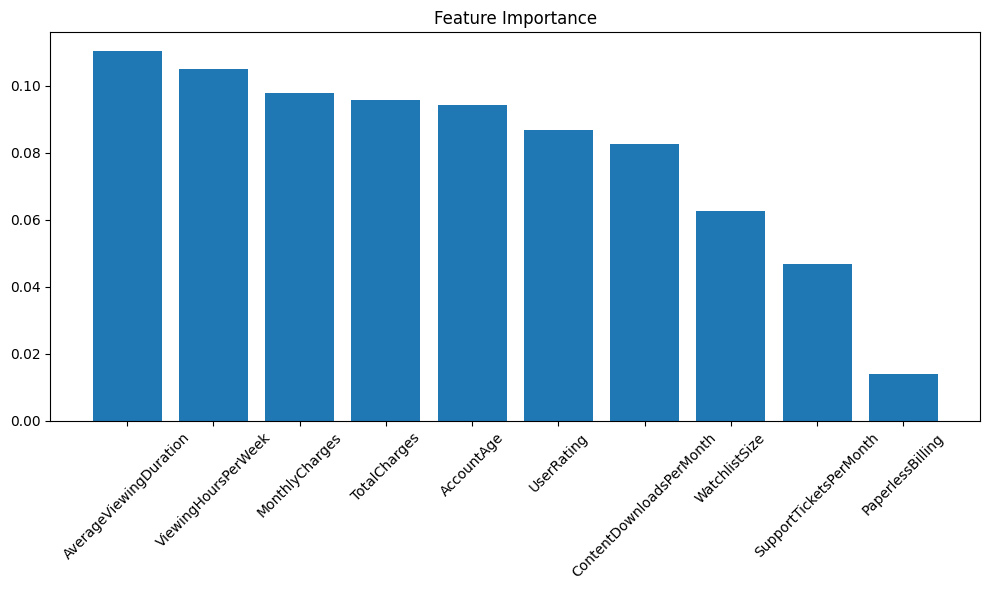

In [22]:
# Feature Importance 확인 (트리 모델로)
import matplotlib.pyplot as plt
import numpy as np

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()


여기까지 이상 무
----
1. class_weight='balanced' 버전으로 다시 학습

  model = LogisticRegression(class_weight='balanced')

2. SMOTE 적용 후 모델 학습

  from imblearn.over_sampling import SMOTE

  sm = SMOTE(random_state=42)

  X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
